## Use tssim to generate a synthetic time series

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from tssim import Simulator
from tssim.features import LongRangeGrowth, Limit, Noise, SimpleSeason

Styling for nicer plots.

In [2]:
plt.style.use('ggplot')
mpl.rcParams['axes.facecolor'] = '#faf9f9'

Define the simulator.

We aim to model a monthly time series with seasonality effects in each quarter, which grows exponentially based on the values in the last 2 years, has a small degree of noise, and cannot fall below zero or exceed 10000000.

Transforms are applied in order, so for example if the noise was applied after the limit it would be possible for values to exceed the bounds slightly.

In [3]:
RANDOM_SEED = 42

simulator = Simulator([
    SimpleSeason(3, 12, 0, 1.000, 0.998),  # depressive season lasting 3 months at the start of every 12 months
    SimpleSeason(3, 12, 3, 1.002, 0.998),  # fluctuating season lasting 3 months, 3 months into every 12 months
    SimpleSeason(3, 12, 6, 1.002, 1.0),  # expansionary season lasting 3 months, 6 months into every 12 months
    SimpleSeason(3, 12, 9, 0.998, 1.0),
    LongRangeGrowth(0.00165, 8, 0.1),  # monthly growth of 0.165% ~= annual growth of 2%
    Noise(0.001, seed=RANDOM_SEED),  # 0.001 (0.1%) is the standard deviation of the noise factor
    Limit(0, 10000000),  # minimum value of 0, maximum value of 10000000
])

Define the starting value of the series and the number of periods (in this case months) to simulate.

In [4]:
YEARS = 10
N = YEARS * 12
BASE = 30000.0

Simulate the data and load into a `pd.Series` for ease of plotting. First a small sample to see the noise clearly.

In [5]:
data: pd.Series = pd.Series(simulator.simulate(BASE, N))

<AxesSubplot: >

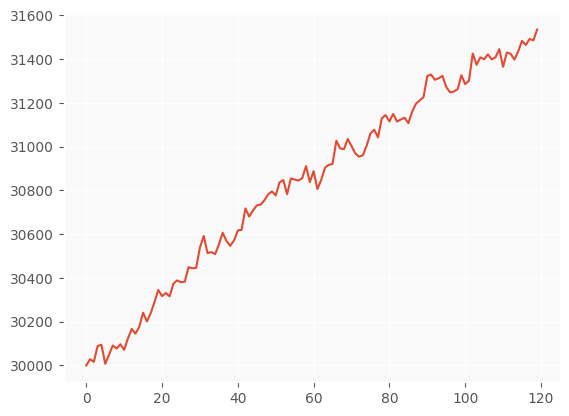

In [6]:
data.plot.line()

<AxesSubplot: >

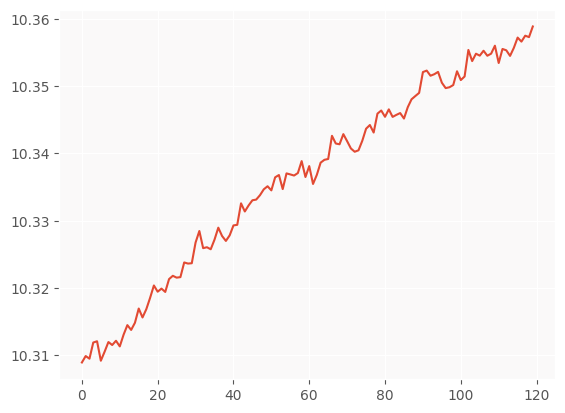

In [7]:
np.log(data).plot.line()  # type: ignore

Then a larger sample.

In [8]:
N = 1100 * 12

In [9]:
data: pd.Series = pd.Series(simulator.simulate(BASE, N))

<AxesSubplot: >

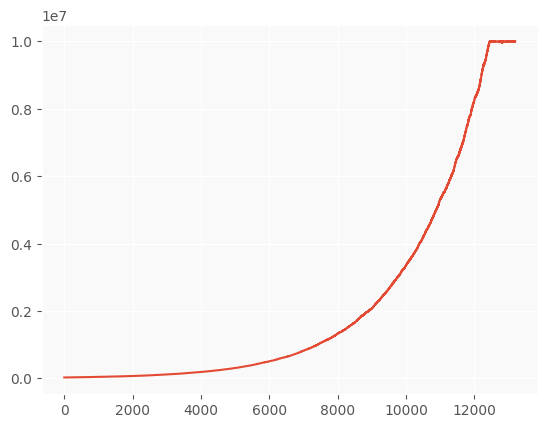

In [10]:
data.plot.line()

<AxesSubplot: >

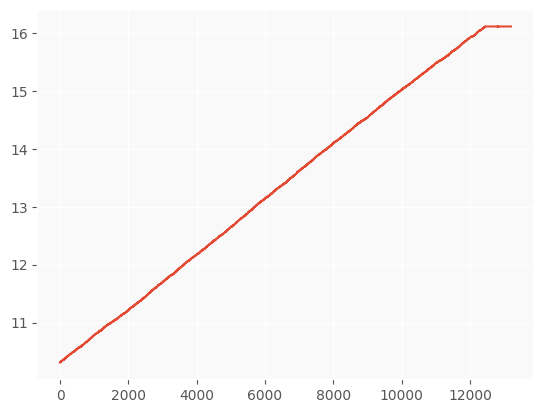

In [11]:
np.log(data).plot.line()  # type: ignore

Custom features are possible by subclassing `tssim.features.Feature` and overriding the `transform()` function.